<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/IMLEjerciciosSantiagoRuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import seaborn as sns; 

sns.set(style="ticks", color_codes=True)
mpg = sns.load_dataset("mpg")
mpg_num=mpg.select_dtypes(include='number')
mpg_nnan=mpg_num.dropna()
mpg_nnan.shape


(392, 7)

In [32]:
mpg_nnan.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [33]:
mpg_nnan.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [0]:
X=mpg_nnan[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3).fit(XS)

In [60]:
Xproj = pca.transform(XS)
Xproj.shape


(392, 3)

In [61]:
print('Valores propios = {} {} {} {}'.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {} {} {}'.format(*pca.explained_variance_ratio_))

IndexError: ignored

In [62]:
100*pca.explained_variance_ratio_.cumsum()

array([71.58051179, 83.94610315, 94.35172845])

In [63]:
100*pca.explained_variance_ratio_

array([71.58051179, 12.36559137, 10.4056253 ])

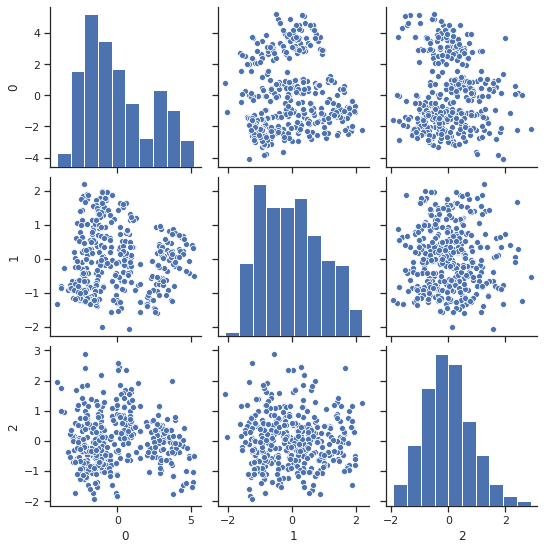

In [68]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
d = pd.DataFrame(Xproj)
g = sns.pairplot(d)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
mpg_nnan=mpg.dropna()
mpg_num=mpg_nnan.select_dtypes(include='number')

X = mpg_num
y = mpg_nnan['origin']


In [83]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

print('Data shape: {}'.format(X.shape))
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))
print('Ranking of features : {}'.format(rfe.ranking_))

Data shape: (392, 7)
Mantained features: [False  True False False False False False]
Ranking of features : [6 1 4 5 7 3 2]


<function matplotlib.pyplot.show>

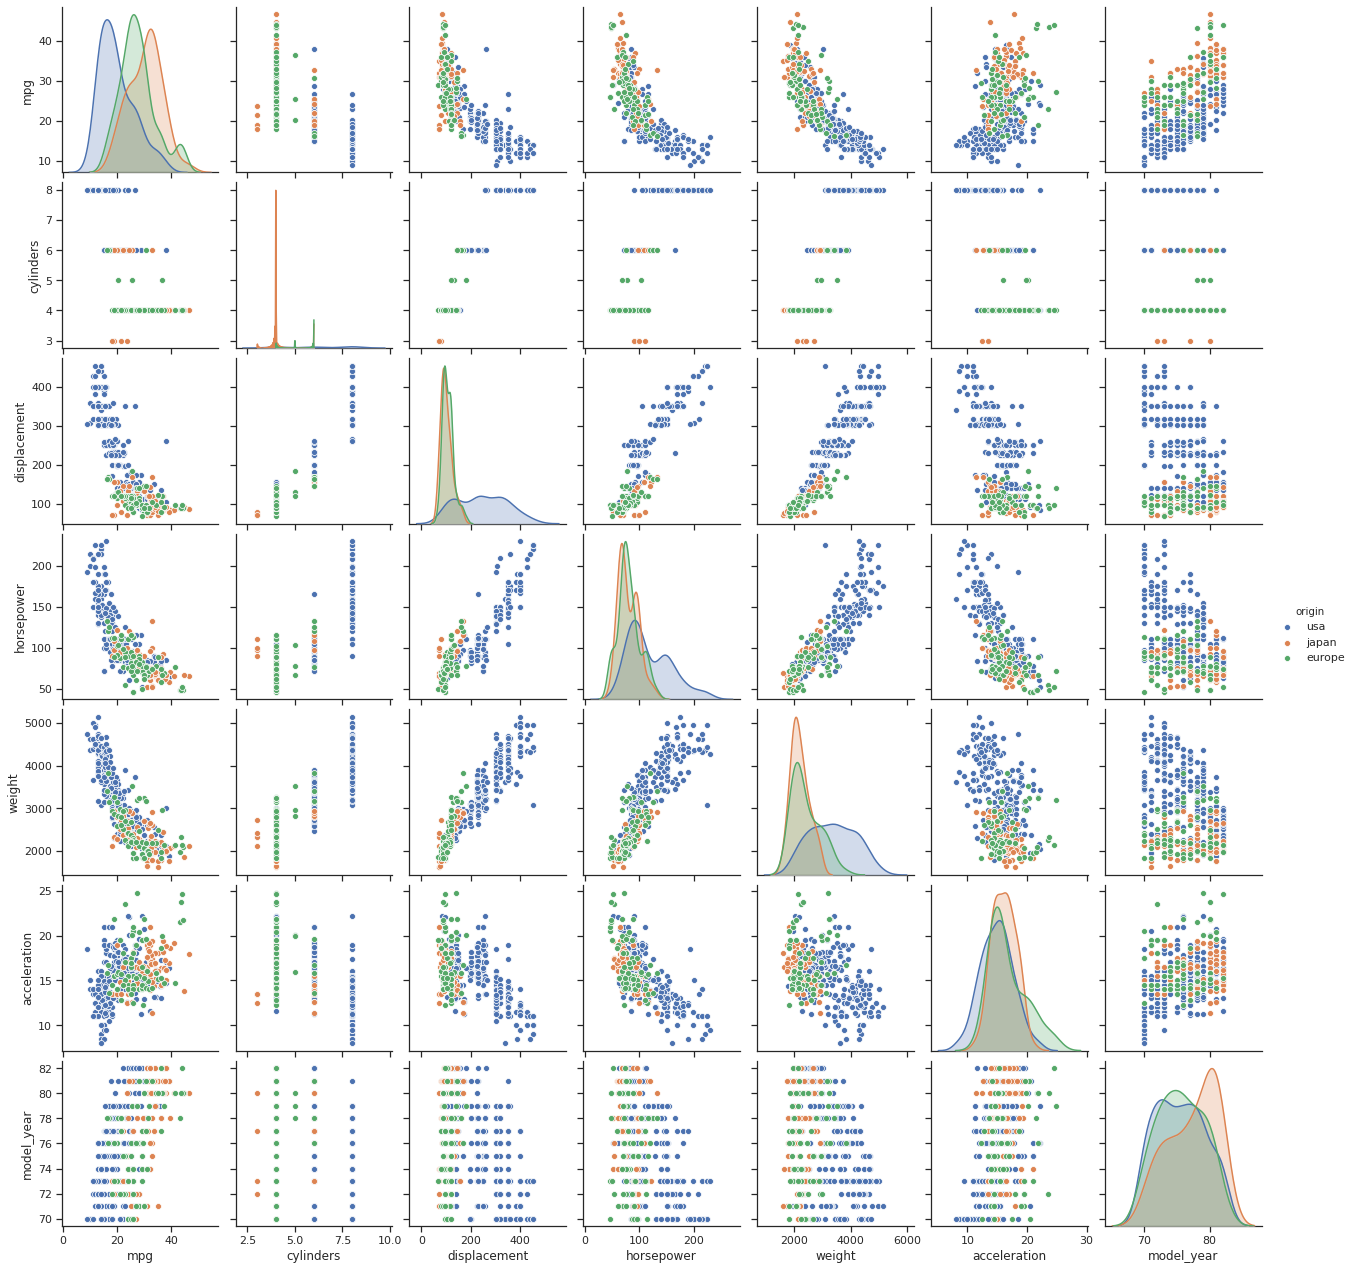

In [84]:
sns.pairplot(mpg_nnan,hue='origin')
plt.show